<h3>Logistic Regression for Binary Classification</h3>

We have previously discussed that classification models do not directly output the class/label of data, but rather the scores or probabilities of data being in each classes. 

For example, if a task is to classify images into DOG and CAT, a model will first calculate the probability of an image being DOG and the probability of that image being CAT, then translate those probability to the actual label of DOG or CAT.

Since probabilities are real numbers, can linear regression models be used? There are a few issues:
- linear regression models output unbounded numbers, whereas probabilities are bounded in [0,1]
- the estimation function of linear regression does not fit the representation of probability

In the below example, the data has one single feature - x which is numbers from 0 to 0.4 and 0.6 to 1. The label y is 0 if x < 0.5 and 1 otherwise. We can observe the estimation pattern of linear regression getting out of bound as well as resulting in fairly high errors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.concatenate([np.linspace(0,0.4,200), np.linspace(0.6,1,200)])
y = (x > 0.5) * 1

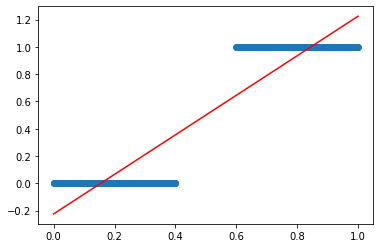

In [3]:
a, b = np.polyfit(x, y, 1)
plt.scatter(x,y)
plt.plot(x, a*x+b, color='red')
plt.show()

Instead, let's fit a logistic regression and observe the estimation pattern

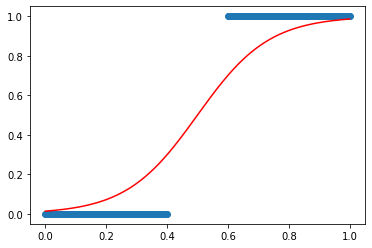

In [4]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x.reshape(-1,1), y)

x2 = np.linspace(0,1,200)
y2 = 1/(1+np.exp(-logistic.intercept_ - x2*logistic.coef_)).flatten()

plt.scatter(x, y)
plt.plot(x2,y2,color='red')
plt.show()

We can see the output of logistic regression representing the transition of probability from class 0 to class 1 much smoother. The output is also bounded. Next, let's talk about Logistic Regression.

The equation of Logistic regression is very similar to linear regression, however the combination of features is wrapped in the 𝒔𝒊𝒈𝒎𝒐𝒊𝒅 function

$𝑠𝑖𝑔𝑚𝑜𝑖𝑑(𝑧) = \dfrac{1}{1+𝑒^{−𝑧}}$

Replace $z$ with with the input part in linear regressino, we obtain logistic regression. Given the features $(𝑥_1,𝑥_2 \dots 𝑥_𝑘)$, logistic regression has the equation

$𝑃(y=1) = \dfrac{1}{1+e^{−(\beta_0 + \beta_1 𝑥_1 + \beta_2 𝑥_2 + \dots + \beta_𝑘 𝑥_𝑘)}}$

The output probability can then be transformed to actual 0 or 1 label by being compared to a threshold, for example, 0.5
- If $𝑃(y=1) \geq 0.5$ then $\hat{y} = 1$
- If $𝑃(y=1) < 0.5$ then $\hat{y} = 0$ 

Training objective for logistic regression is function that is called <b>Binary Cross-Entropy</b>

$min⁡ −\sum_{𝑑𝑎𝑡𝑎} 𝑦∗log⁡(𝑃(𝑦=1))+(1−𝑦)∗log⁡(1−𝑃(𝑦=1))$

This means if true 𝑦 is 1 then $𝑃(𝑦=1)$ should be very close to 1, and if true 𝑦 is 0 then $𝑃(𝑦=1)$ should be very close to 0 for the training objective to be small

Similar to Linear regression, Logistic regression may also overfit the data without regularization. Logistic regression also has three types of regularization similar to linear regression. In SKLearn, we need to tune the following hyper-parameters:
- penalty – decides the regularization type, can be ‘l2’, ‘l1’, ‘elasticnet’, or ‘none’
    - ‘l2’ regularization is similar to Ridge regression (this is the default model)
    - ‘l1’ regularization is similar to LASSO
    - ‘elasticnet’ is similar to Elastic Net
    - ‘none’ means no regularization
- C – similar to alpha in Ridge regression and LASSO (default is 1)
- l1_ratio – similar to l1_ratio in Elastic Net, only applicable in penalty=‘elasticnet’ (default is None)

<h3> Examples on Actual Data</h3>

In this example, we use the heart disease data. You can find the dataset in https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction. The data has the following features

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality, LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

The target is HeartDisease

In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('heart_disease.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [9]:
data.shape

(918, 12)

<h4>Train/Test Split </h4>

Recall, the target in this data is column 15, we will use stratified split based on column 15

In [10]:
from sklearn.model_selection import train_test_split


X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)

trainX.shape, testX.shape, trainY.shape, testY.shape

((734, 11), (184, 11), (734,), (184,))

<h4>Preliminary Analysis</h4>

In [11]:
trainX.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.700272,132.399183,197.351499,0.224796,136.501362,0.902452
std,9.524869,18.811336,108.786456,0.417732,25.496850,1.049092
min,28.000000,0.000000,0.000000,0.000000,63.000000,-1.500000
25%,47.000000,120.000000,170.000000,0.000000,119.000000,0.000000
50%,54.000000,130.000000,221.000000,0.000000,138.000000,0.600000
75%,61.000000,140.000000,264.750000,0.000000,155.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,195.000000,6.200000


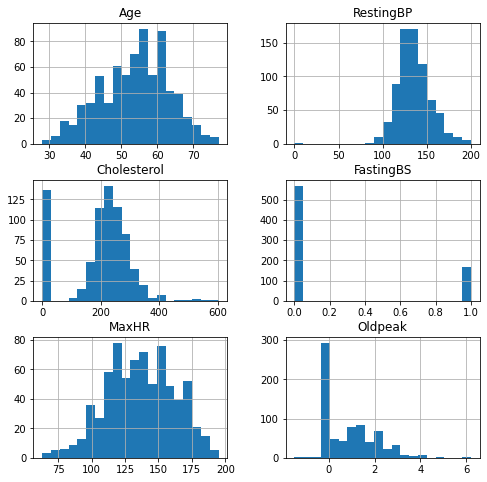

In [12]:
import matplotlib.pyplot as plt

trainX.hist(figsize=(8,8), bins=20)
plt.show()

Sex


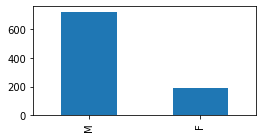

ChestPainType


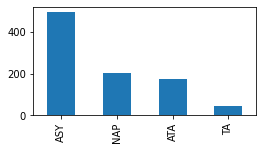

RestingECG


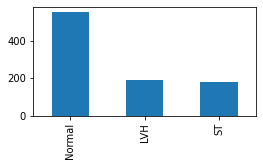

ExerciseAngina


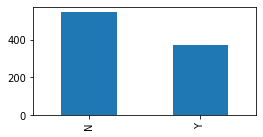

ST_Slope


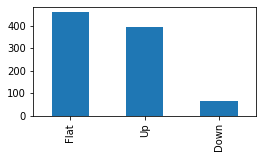

In [13]:
cat_cols = ['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in cat_cols:
    print(col)
    data[col].value_counts().plot(kind='bar', figsize=(4,2))
    plt.show()

The only issue is some rows have Cholesterol of 0. We will consider these missing and impute them.

<h4>Preprocessing</h4>

First, we need to replace cholesterol of 0 with missing so it can be imputed

In [14]:
#get a list of numeric columns
#we use '|' to combine condition because we have both int64 and float64 in the columns
num_cols = trainX.columns[(trainX.dtypes == np.int64) | (trainX.dtypes == np.float64)]

#create a transform function for FunctionTransformer
def remove_0_choles(X):
    X.loc[X['Cholesterol']==0, 'Cholesterol'] = np.nan
    return X

Now we can build our pipeline and transform the data

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('remove 0 cholesterol', FunctionTransformer(remove_0_choles, validate=False)),
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='constant',fill_value='missing')),
    ('encode', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('numeric', num_pipeline, num_cols),
    ('class', cat_pipeline, cat_cols)
])

trainX_prc = full_pipeline.fit_transform(trainX)

trainX_prc.shape

(734, 20)

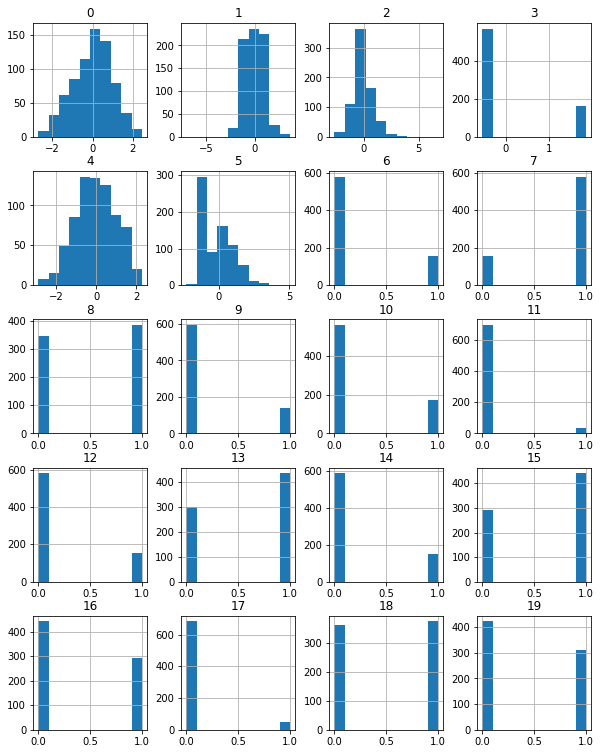

In [16]:
pd.DataFrame(trainX_prc).hist(figsize=(10,13))
plt.show()

And the test data

In [17]:
#Similarly for testing data
testX_prc = full_pipeline.transform(testX)  
testX_prc.shape

(184, 20)

<h4>Modeling with Logistic Regression</h4>

Just as any other sklearn models, begin analysis is very easy. First, let's try the default model. I will just consider accuracy and F1 score. You may want to practice with other measurements/curves

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

#create new model
logistic = LogisticRegression()

#train 
logistic.fit(trainX_prc, trainY)

#get CV accuracy
accuracy_3cv = cross_val_score(logistic, trainX_prc, trainY, cv=3, scoring="accuracy")

#get prediction for computation of F1 score
y_train_pred = cross_val_predict(logistic, trainX_prc, trainY, cv=3)

print('Training Accuracy: ', logistic.score(trainX_prc, trainY))
print('Cross-Validation Accuracy: ',accuracy_3cv.mean())
print('Cross-Validation F1: ', f1_score(trainY, y_train_pred))

Training Accuracy:  0.8746594005449592
Cross-Validation Accuracy:  0.8624344819895171
Cross-Validation F1:  0.8787515006002401


The default model seems to be ok, no significant signs of overfitting. Let's try finetune it.

<h4>L2 Regularization</h4>

Recall, this is similar to Ridge regression - we add the sum of squares values of coefficients to the training objective. However, the hyperparameter is <b>C</b>, NOT alpha.

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1 , 5, 10, 50, 100]}]

#the default is l2 anyway, but we can specify it so that the code is clear
#logistic regression is also trained iteratively, we can increase max_iter if you see some warning from sklearn
logistic = LogisticRegression(penalty='l2', max_iter=5000)

grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX_prc,trainY)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid=[{'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                                50, 100]}],
             return_train_score=True, scoring='accuracy')

Let's look at the best model

In [48]:
print(grid_search.best_params_)
print(grid_search.best_score_) #accuracy

{'C': 0.1}
0.863787158699096


In [49]:
cross_val_score(LogisticRegression(penalty='l2', C=0.1), trainX_prc, trainY, scoring='f1').mean() #f1

0.879437249148501

And apply it on the testing data

In [50]:
best_l2_logistic = grid_search.best_estimator_
best_l2_logistic.score(testX_prc, testY) #accuracy

0.8369565217391305

In [51]:
f1_score(testY, best_l2_logistic.predict(testX_prc)) #f1

0.8484848484848485

<h4>L1 Regularization</h4>

This is similar to LASSO, we add sum of absolute values to the training objective

In [24]:
param_grid = [{'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1 , 5, 10, 50, 100]}]

#now we need to specify penalty to l1
#also, we need to set solver to 'liblinear' because the default solver doesn't support l1
logistic = LogisticRegression(penalty='l1', max_iter=5000, solver='liblinear')

grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX_prc,trainY)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=5000, penalty='l1',
                                          solver='liblinear'),
             param_grid=[{'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                                50, 100]}],
             return_train_score=True, scoring='accuracy')

Best model performance:

In [25]:
print(grid_search.best_params_)
print(grid_search.best_score_) #accuracy

{'C': 0.1}
0.8624359332774206


In [26]:
cross_val_score(LogisticRegression(penalty='l1', C=1, solver='liblinear'), trainX_prc, trainY, scoring='f1').mean() #f1

0.8737660610669231

And in the testing data

In [27]:
best_l1_logistic = grid_search.best_estimator_

best_l1_logistic.score(testX_prc, testY) #accuracy

0.8315217391304348

In [28]:
f1_score(testY, best_l1_logistic.predict(testX_prc)) #f1

0.8426395939086294

<h4>Elastic Net Regularization</h4>

Similar to Elastic Net model in regression, we use both l1 and l2 regularization in the same model. Now we need to finetune both C and l1_ratio

In [29]:
#now penalty is changed to elasticnet
#and we need to change solver to saga
logistic = LogisticRegression(penalty='elasticnet', max_iter=5000, solver='saga')

param_grid = [{
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1 , 5, 10, 50, 100],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}]

grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX_prc,trainY)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=5000, penalty='elasticnet',
                                          solver='saga'),
             param_grid=[{'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                                50, 100],
                          'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                       0.9]}],
             return_train_score=True, scoring='accuracy')

Best model performance

In [30]:
print(grid_search.best_params_)
print(grid_search.best_score_) #accuracy

{'C': 0.05, 'l1_ratio': 0.2}
0.8678687913521573


In [31]:
cross_val_score(LogisticRegression(penalty='elasticnet', C=0.1, l1_ratio=0.3, solver='saga'), trainX_prc, trainY, scoring='f1').mean() #f1

0.878628658497038

And apply to testing data

In [32]:
best_enet_logistic = grid_search.best_estimator_

best_enet_logistic.score(testX_prc, testY) #accuracy

0.8315217391304348

In [33]:
f1_score(testY, best_enet_logistic.predict(testX_prc)) #f1

0.8442211055276382

<h4>No-Regularization Model</h4>

Finally, let's see how a model without regularization perform

In [45]:
#we need to set penalty to 'none'
logistic = LogisticRegression(penalty='none', max_iter=5000)

#train 
logistic.fit(trainX_prc, trainY)

#get CV accuracy
accuracy_3cv = cross_val_score(logistic, trainX_prc, trainY, cv=3, scoring="accuracy")

#get prediction for computation of F1 score
y_train_pred = cross_val_predict(logistic, trainX_prc, trainY, cv=3)

print('Training Accuracy: ', logistic.score(trainX_prc, trainY))
print('Cross-Validation Accuracy: ',accuracy_3cv.mean())
print('Cross-Validation F1: ', f1_score(trainY, y_train_pred))
print('Testing Accuracy: ', logistic.score(testX_prc, testY))
print('Testing F1:', f1_score(testY, logistic.predict(testX_prc)))

Training Accuracy:  0.8746594005449592
Cross-Validation Accuracy:  0.8624344819895171
Cross-Validation F1:  0.8784596871239472
Testing Accuracy:  0.8478260869565217
Testing F1: 0.86


Both the CV accuracy and testing accuracy drop more than in other models. The no-regularization model may be overfitting the data slightly

<h4>Result Summary</h4>

We can summarize all model performances in a table. I'll just focus on accuracy

|Model|Training CV Accuracy| Testing Accuracy| Training CV F1  | Testing F1      |
|-----|--------------------|-----------------|-----------------|-----------------|
|L2 Regularization|0.864|0.837|0.879|0.848|
|L1 Regularization|0.862|0.832|0.874|0.842|
|ENet Regularization|0.868|0.832|0.879|0.844|
|No Regularization|0.862|0.848|0.878|0.86|
